In [188]:
import numpy as np # Computing library
from sklearn import preprocessing,svm,neighbors #shuffle data, biased the data # negative 1 to 1 postive
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import cross_val_score
import pandas as pd

In [189]:
df = pd.read_csv("breast-cancer-wisconsin.data",index_col=False)
df.head(3)
df.replace("?", -99999, inplace =True)
df =df.drop(['patient_id'],axis=1)
df.head()

,ClumpThickness,UniformityOfCellSize,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [213]:
from sklearn.model_selection import train_test_split

X = np.array(df.drop('Class', axis=1)) # Except Predict Label 
y = np.array(df['Class']) # Only expected output label(Predict value column)

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = neighbors.KNeighborsClassifier(n_jobs = 1) # n_jobs = - 1 or 1 or 5..etc. 
clf.fit(X_train,y_train)

accuracy = clf.score(X_test,y_test)
print(accuracy) # 96.42

# Option 1 for example prediction values 
example_measures = np.array([4,2,1,1,1,2,3,2,1])  # Prediction values goes here 
example_measures  = example_measures.reshape(1,-1) # here 1 (one) is refer to length of the given prediction list values

prediction = clf.predict(example_measures)
print(prediction)

# Option 2 for example prediction values 
example_measures = np.array(
                                [
                                    [4,2,1,1,1,2,3,2,1],
                                    [4,2,1,2,1,2,3,2,1]
                                ]
                            )  # Prediction values goes here 
example_measures  = example_measures.reshape(len(example_measures),-1)

prediction = clf.predict(example_measures)
print(prediction)

0.9857142857142858
[2]
[2 2]


## Euclidean Distance
![Euclidean distance](img.png)

In [16]:
import math
plot1 = [1,3]
plot2 = [2,5]
euclidean_distance = math.sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2) # TWO DIMESTION 
print(euclidean_distance)
print(round(euclidean_distance, 2))

2.23606797749979
2.24


In [20]:
# Implimentation

import numpy as np
import math # This built in Math function 

import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use ('fivethirtyeight')

In [21]:
dataset = {
    "k":[
        [1,2],
        [2,3],
        [3,1]
    ],
    "r":[
        [6,5],
        [7,7],
        [8,6]
    ]
    
}
new_features = [5,7]

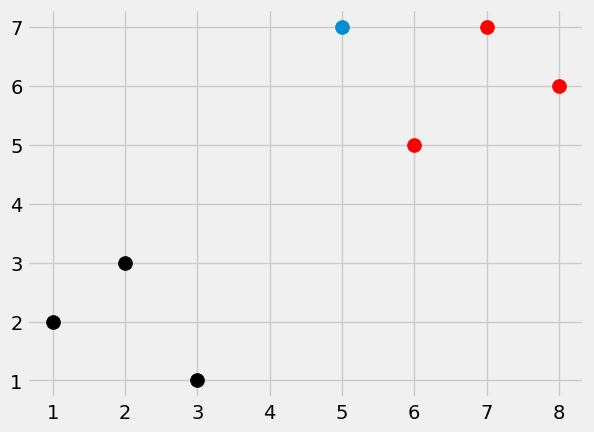

In [206]:
for i in dataset : 
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100,color = i)
        
#Optimal One liner Code for above snippet 
# [ [plt.scatter(ii[0],ii[1],s=100, color=i) for ii in dataset[i]] for i in dataset ]
plt.scatter(new_features[0],new_features[1], s =100)
plt.show()

In [53]:
def k_nearest_neighbors(data,predict, k=3): 
    if len(data)>=k : print("K is set to a value less than total voting groups/feature")
    distances = []
    for group in data:
        for features in data[group]:
#             euclidean_distance= math.sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
#             print(euclidean_distance)
#             print(round(euclidean_distance, 2))
#             euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
#     print(distances)
#     print(sorted(distances))
    votes = [ i[1] for i in sorted(distances)[:k] ] # Here picking top K values(here K is 3 as per the given )
    print(votes)
    print(Counter(votes).most_common(1))
    print(Counter(votes))
    votes_result = Counter(votes).most_common(1)[0][0]
    return votes_result

In [54]:
dataset = {
    "k":[
        [1,2],
        [2,3],
        [3,1]
    ],
    "r":[
        [6,5],
        [7,7],
        [8,6]
    ]
    
}
new_features = [5,7]
result = k_nearest_neighbors(dataset,new_features,k=3)

['r', 'r', 'r']
[('r', 3)]
[('r', 3)]
Counter({'r': 3})


In [38]:
result

'r'

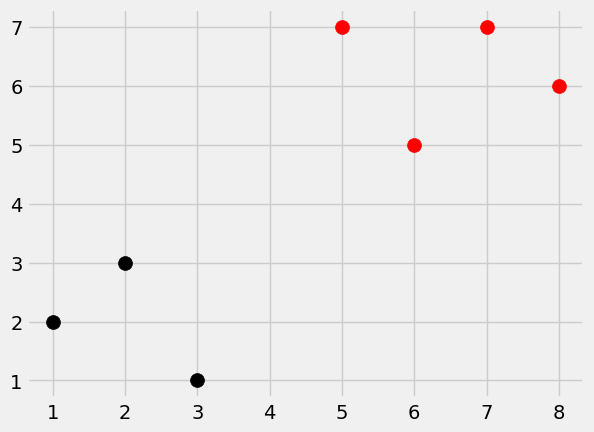

In [57]:
for i in dataset : 
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100,color = i) # here is "i" marked as GROUP type
        
plt.scatter(new_features[0],new_features[1], s =100, color =result) # marking to most matched GROUP
plt.show()

## Applying our K Nearest Neighbors Algorithm

In [58]:
import numpy as np
import pandas as pd
from math import sqrt
import random
import warnings

In [184]:
def k_nearest_neighbors_algo(data,predict, k=3):
    if len(data)>=k :
        warnings.warn("K is set to a value less than total voting groups/feature")
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [ i[1] for i in sorted(distances)[:k] ]
#     print(Counter(votes).most_common(1))
    votes_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
#     print(votes_result, confidence)
    return votes_result, confidence # type of group/predict value - which returns is SINGLE VALUE which is compared value(expected value)

In [160]:
df = pd.read_csv("breast-cancer-wisconsin.data",index_col=False)
df.head(3)
df.replace("?", -99999, inplace =True)

In [161]:
# len(df)
# df.patient_id

In [162]:
# df.columns = [
#     'ID','ClumpThickness','UniformityOfCellSize','Uniformity_of_Cell_Shape_',
#     "Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"
# ]

In [163]:
df =df.drop(['patient_id'],axis=1)
df.head()

,ClumpThickness,UniformityOfCellSize,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [164]:
full_data = df.astype(float).values.tolist() # To avoid the string values or misCleared Typed Values

In [125]:
full_data[:10]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]

In [126]:
random.shuffle(full_data) ##  shuffle help to shuffle the radomly to balance data

In [127]:
full_data[:10]

[[3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 10.0, 6.0, 10.0, 10.0, 10.0, 10.0, 4.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 3.0, 5.0, 2.0, 3.0, 10.0, 7.0, 1.0, 1.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 1.0, 1.0, 2.0],
 [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [8.0, 3.0, 8.0, 3.0, 4.0, 9.0, 8.0, 9.0, 8.0, 4.0],
 [5.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0, 1.0, 4.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [10.0, 10.0, 10.0, 3.0, 10.0, 10.0, 9.0, 10.0, 1.0, 4.0]]

In [186]:
test_size = 0.4
train_set = {2.0:[],4.0:[]}
test_set  = {2.0:[],4.0:[]}

train_data = full_data[:-int(test_size*len(full_data))] # TRAIN DATA SET CREATION ->  80%
test_data = full_data[-int(test_size*len(full_data)):] # TEST DATA SET CREATION ->  20%

for i in train_data: 
    if float(i[-1]) not in train_set.keys():
        train_set[i[-1]]=[i[:-1]]
    else:
        train_set[i[-1]].append(i[:-1])
        
for i in test_data: 
    test_set[i[-1]].append(i[:-1])

    


In [187]:
correct = 0 
total =0 

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors_algo(train_set,data,k=5) # FOR Complate Set of Train data check the each point of Test set
        if group == vote: # if is matching our expected test set output
            correct +=1
        else:
            print(confidence)
        total +=1
print('accuracy:', correct/total)

0.8
0.6
0.8
accuracy: 0.989247311827957
